In [12]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [13]:
# general settings for signal and noise
sample_freq = 1e6  # in Hz
length = 0.01024  # in s
signal_power = 0.0  # in dB
noise_power = 10.0  # in dB

# create the signal (the 'soft speaker' kind)
wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length, seed=None)
sig = wm.soft(f_center=-1e5, power=signal_power, dB=True)
# sig += wm.soft(f_center=-2e5, power=signal_power+2, dB=True)
# sig += wm.soft(f_center=1e5, power=signal_power-3, dB=True)
# sig += wm.soft(f_center=2.5e5, power=signal_power+3, dB=True)
# sig += wm.soft(f_center=1.5e5, power=signal_power+6, dB=True)
# sig += wm.soft(f_center=-2.5e5, power=signal_power+3, dB=True)
# sig += wm.soft(f_center=2e5, power=signal_power+6, dB=True)
# sig += wm.soft(f_center=-1.5e5, power=signal_power+5, dB=True)
# sig += wm.soft(f_center=.5e5, power=signal_power+3, dB=True)
# sig += wm.soft(f_center=-.5e5, power=signal_power+2, dB=True)
# sig += wm.soft(f_center=0e5, power=signal_power+1, dB=True)

# create the noise
wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length, seed=None)
noise = wgn.signal(power=noise_power, dB=True)

# ensure noise and signal have same length (and create global variable 'num_samples')
assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

# create actual signal ('both') comprising of signal and additive white Gaussian noise (AWGN)
both = sig + noise

# print some info about signal and noise
print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num samples:  %d' % (num_samples))

# ensure that Parseval's theorem holds
ss.util.check_parseval(both, length, sample_freq)

Signal power: -0.00 dB
Noise power:  10.00 dB
SNR:          -10.00 dB
Num samples:  10240


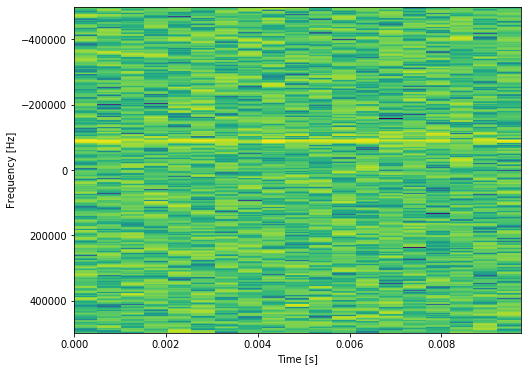

In [14]:
# use the 2d plot function to plot the spectogram
ss.spectrum_plot_2d(sig=both,
                    f_sample=sample_freq,
                    window='flattop',
                    nfft=512)

100%|██████████| 10190/10190 [00:00<00:00, 82022.50it/s]


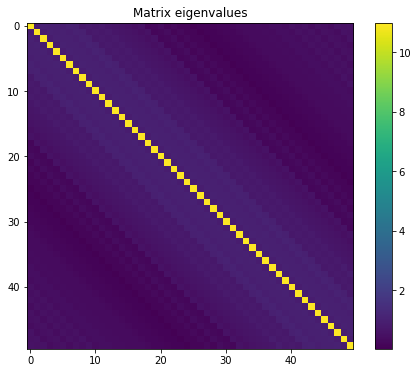

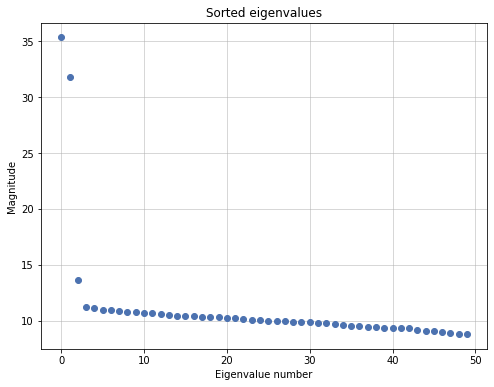

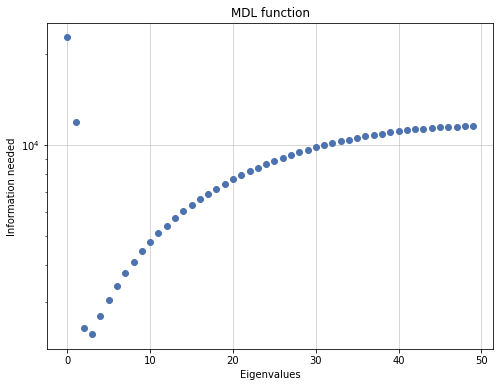

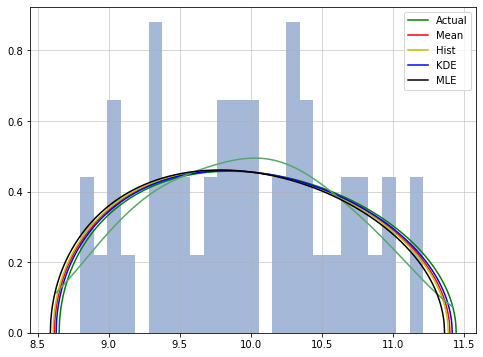

Actual:   10.0000 dB
Mean:     9.9832 dB  err: -24.1244 dB
Fit hist: 9.9788 dB  err: -23.1000 dB
Fit KDE:  9.9894 dB  err: -26.1301 dB
MLE:      9.9688 dB  err: -21.4238 dB


In [15]:
# estimate noise power directly from signal samples
mean, fit_hist, fit_kde, mle = ss.noise_est.estimate(both, num_samples, l=50, prints=True, true_power=noise_power)

print('Actual:   %.4f dB' % (noise_power))
print('Mean:     %.4f dB  err: %.4f dB' %
      (mean, ss.util.dB_rel_err(noise_power, mean)))
print('Fit hist: %.4f dB  err: %.4f dB' %
      (fit_hist, ss.util.dB_rel_err(noise_power, fit_hist)))
print('Fit KDE:  %.4f dB  err: %.4f dB' %
      (fit_kde, ss.util.dB_rel_err(noise_power, fit_kde)))
print('MLE:      %.4f dB  err: %.4f dB' % (mle, ss.util.dB_rel_err(noise_power, mle)))